In [5]:
#import pyfair
from pyfair.model.model import FairModel
from pyfair.model.meta_model import FairMetaModel

import matplotlib
%matplotlib inline

import numpy as np
import pandas as pd

import pyfair

In [6]:
import json

with open('./serialized_model.json', 'r') as f:
    print(f.read())

{
    "HA1": {
        "Loss Event Frequency": {
            "low": 20,
            "mode": 100,
            "high": 900
        },
        "Primary Loss": {
            "low": 3000000,
            "mode": 3500000,
            "high": 5000000
        },
        "multi_Secondary Loss": {
            "Secondary Loss Event Frequency": {
                "Reputational": {
                    "low": 0.01,
                    "mode": 0.8,
                    "high": 0.99
                }
            },
            "Secondary Loss Event Magnitude": {
                "Reputational": {
                    "low": 10000,
                    "mode": 20000,
                    "high": 100000
                }
            }
        },
        "name": "HA1",
        "n_simulations": 10000,
        "random_seed": 42,
        "model_uuid": "e50a157a-8cb7-11e9-960a-f06e0bbd6cbe",
        "type": "FairModel",
        "creation_date": "2019-06-11 21:15:06.105791"
    },
    "HA2": {
        "Loss Event Fr

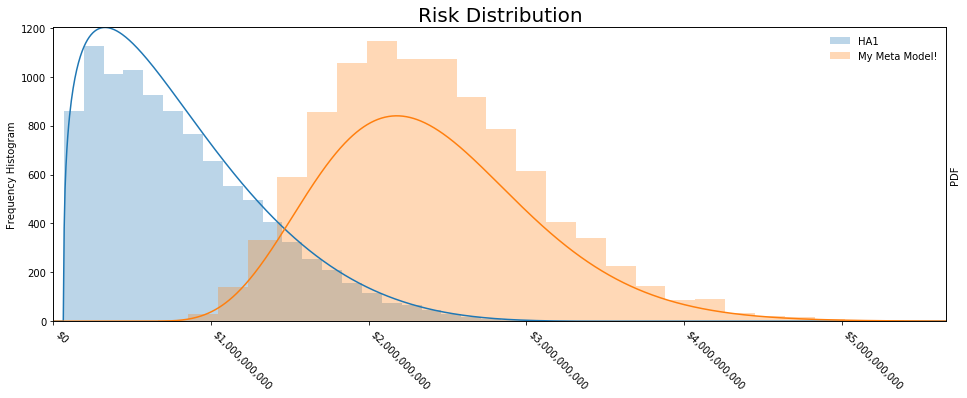

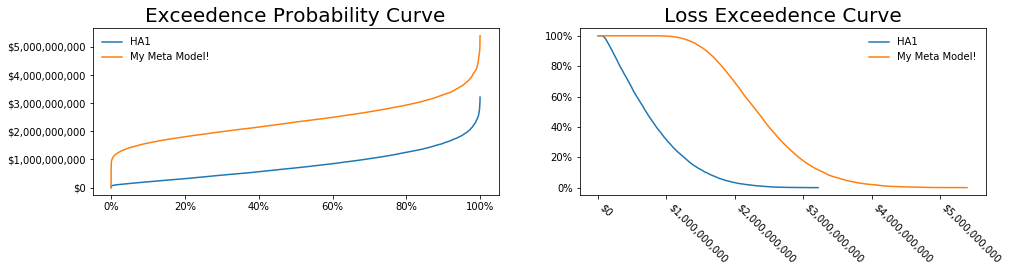

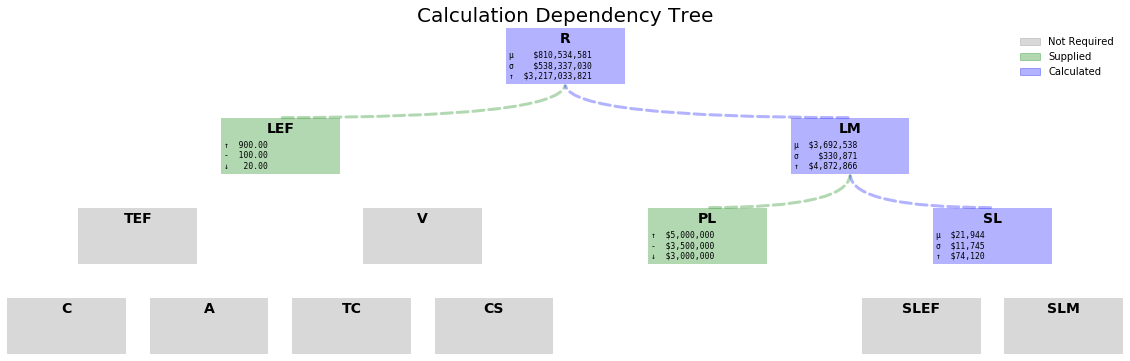

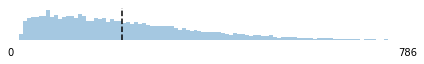

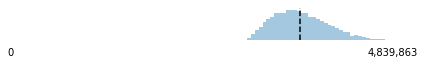

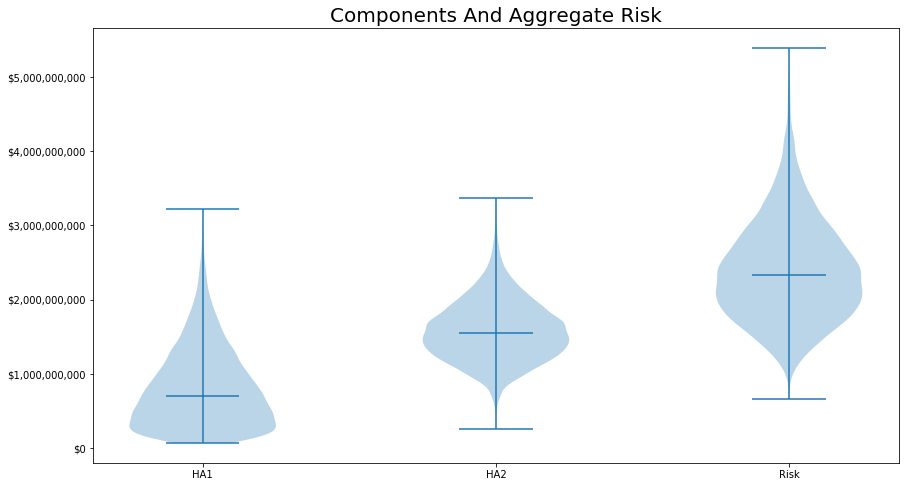

In [9]:
model1 = pyfair.FairModel(name="HA1", n_simulations=10_000)
model1.input_data('Loss Event Frequency', low=20, mode=100, high=900)
model1.input_data('Primary Loss', low=3_000_000, mode=3_500_000, high=5_000_000)
model1.input_multi_data('Secondary Loss', {
    'Secondary Loss Event Frequency': {
        'Reputational': {
            'low': .01,
            'mode': .80,
            'high': .99,
        }
    },
    'Secondary Loss Event Magnitude' : {
        'Reputational': {
            'low': 10_000,
            'mode': 20_000,
            'high': 100_000,
        }
    }
})

model1.calculate_all()

model2 = pyfair.FairModel(name="HA2", n_simulations=10_000)
model2.bulk_import_data({
    'Loss Event Frequency':    {'mean':.5, 'stdev':.1},
    'Loss Magnitude': {'low': 2_000_000_000, 'mode': 3_000_000_000, 'high': 5_000_000_000}
})
model2.calculate_all()

model3 = pyfair.FairModel(name="HA3", n_simulations=10_000)
model3.input_data('Loss Event Frequency', low=10, mode=15, high=16)
model3.input_data('Loss Magnitude', low=500_000_000, mode=500_900_000, high=600_000_000)
model3.calculate_all()

fsr = pyfair.FairSimpleReport([model1, mm])
fsr.to_html('output.html')

In [8]:
mm = pyfair.FairMetaModel(name='My Meta Model!', models=[model1, model2])
mm.calculate_all()



#fsr = pyfair.FairSimpleReport([model2, mm])
#fsr.to_html('output.html')

print(mm.to_json())

with open('./serialized_model.json', 'w') as f:
    f.write(mm.to_json())
    
with open('./serialized_model.json', 'r') as f:
    model = FairMetaModel.read_json(f.read())
    
model

{
    "HA1": {
        "Loss Event Frequency": {
            "low": 20,
            "mode": 100,
            "high": 900
        },
        "Primary Loss": {
            "low": 3000000,
            "mode": 3500000,
            "high": 5000000
        },
        "multi_Secondary Loss": {
            "Secondary Loss Event Frequency": {
                "Reputational": {
                    "low": 0.01,
                    "mode": 0.8,
                    "high": 0.99
                }
            },
            "Secondary Loss Event Magnitude": {
                "Reputational": {
                    "low": 10000,
                    "mode": 20000,
                    "high": 100000
                }
            }
        },
        "name": "HA1",
        "n_simulations": 10000,
        "random_seed": 42,
        "model_uuid": "e8d50c38-904f-11e9-86e4-f06e0bbd6cbe",
        "type": "FairModel",
        "creation_date": "2019-06-16 11:00:49.460332"
    },
    "HA2": {
        "Loss Event Fr

TypeError: read_json() takes 1 positional argument but 2 were given

# Components

<section header and metadata>

<section overview>

* Summary General
    * Summary Table (mean, stdev, low, high, n)
    * hist
    * Exceedence curves
* Summary Comparison
    * Summary Table (mean, stdev, low, high, n)
    * Summary Table 2
    * Combined Hist
    * Exceedence curves
    
<section parameters>

* Model Detail
    * Parameter table with distributions
* Metamodel Detail
    * Risk table with stacked area
    
<section> and source code
* JSON

# Reports
* Compare
* Single
* Metamodel Drilldown

In [ ]:
from pyfair.utility.factory import FairModelFactory

static = {
    "Loss Event Frequency": {
        "low": 20,
        "mode": 100,
        "high": 900
    },
}

variable = {
    'Model 1': {
        "Loss Magnitude": {
            "low": 3000000,
            "mode": 3500000,
            "high": 5000000
        }
    },
    'Model 2': {
        "Loss Magnitude": {
            "low": 300000,
            "mode": 350000,
            "high": 500000
        },
    }
}
    
factory = FairModelFactory(static)

factory.generate_from_partials(variable)

In [ ]:
from pyfair.report.distribution import FairDistributionCurve

fdc = FairDistributionCurve([model1, model2, model3])
#fig, ax = fdc.generate_image()

fig, ax = fdc.generate_image()
fdc.generate_icon('HA1', 'Risk')

In [ ]:
from pyfair.report.exceedence import FairExceedenceCurves

fpc = FairExceedenceCurves([model1, model2, model3])
fig1, ax1 = fpc.generate_image()

In [ ]:
import numpy as np

In [12]:
import xlrd

xlrd.__VERSION__

'1.2.0'

In [22]:
wb = xlrd.open_workbook('./pyfair/static/data_entry.xlsx')

In [103]:
import xlrd

import pandas as pd


class FairSimpleParser(object):
    
    def __init__(self, workbook_path):
        self._path     = workbook_path
        self._names    = list()
        self._raw_data = dict()
        self._data     = dict()
        self._populate_object()
        self._refine_overview()
        self._refine_tabs()
        
    def _populate_object(self):
        '''Read sheet data.'''
        # Read workbook
        wb = xlrd.open_workbook(self._path)
        # Create sheets via list comprehension
        self._names  = wb.sheet_names()
        for name in self._names:
            df = pd.read_excel(self._path, sheet_name=name)
            self._raw_data[name] = df
            
    def _refine_overview(self):
        overview_name = self._names[0]
        raw_overview  = self._raw_data[overview_name]
        # Discard everything lacking a key
        overview = raw_overview.dropna(subset=['Key'])
        overview = overview.iloc[:, :2].set_index('Key')
        self._data[overview_name] = overview

    def _refine_tabs(self):
        for tab in self._names[1:]:
            frames = []
            i = 0
            for i in 
            df = pd.read_excel(self._path, sheet_name=tab)
            
        
        
        
        
    
    
fsp = FairSimpleParser('./pyfair/static/data_entry.xlsx')
fsp

entry_1
entry_2


In [106]:
fsp._raw_data['entry_1']

,Key,Value,Unnamed: 2,Target Name,low,mode,high,gamma,mean,stdev,p,constant,Unnamed: 12,Loss Name,Secondary Loss Event Frequency,Secondary Loss Event Magnitude
0,Model Name,NaN,NaN,Loss Event Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Threat Event Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Vulnerability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Threat Capability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Control Strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,Loss Magnitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Primary Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Secondary Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
fsp._raw_data['entry_1']

,Key,Value,Unnamed: 2,Target Name,low,mode,high,gamma,mean,stdev,p,constant,Unnamed: 12,Loss Name,Secondary Loss Event Frequency,Secondary Loss Event Magnitude
0,Model Name,NaN,NaN,Loss Event Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Threat Event Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Vulnerability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Threat Capability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Control Strength,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,Loss Magnitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Primary Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,Secondary Loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Low,Mode,High
Alice,10.0,20.0,80.0
Bob,30.0,90.0,95.0
Charlie,30.0,80.0,93.0
Average,23.3,63.3,89.3


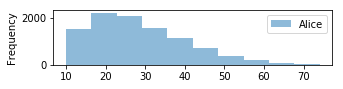

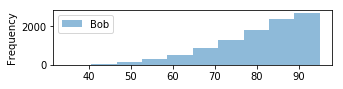

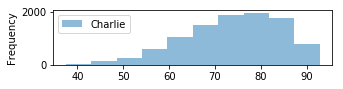

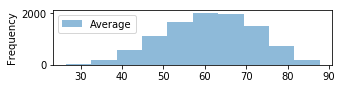

In [136]:
import matplotlib.pyplot as plt

from pyfair.utility import FairBetaPert

df = pd.DataFrame(
    data={
        'Low' : [10, 30, 30],
        'Mode': [20, 90, 80],
        'High': [80, 95, 93]
    },
    index=['Alice', 'Bob', 'Charlie']
)

df.loc['Average'] = df.mean().round(1)

for name, row in df.iterrows():
    fig, ax = plt.subplots(1)
    fbp = FairBetaPert(low=row['Low'], mode=row['Mode'], high=row['High'])
    rvs = pd.Series(fbp.random_variates(10000))
    my_ax = rvs.plot.hist(ax=ax, alpha=.5, figsize=(5,1))
    ax.legend([name])
    
df

In [ ]:
def generate_icon(self, model_name, target):
    '''Minimalist histogram (not for comparisons)'''
    model = self._input[model_name]
    data = model.export_results().loc[:, target]
    # Set up ax and params
    fig, ax = plt.subplots(figsize=(6, 1))
    ax.set_xlim(0, data.max())
    # Set spines and axis invisible
    for spine in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine].set_visible(False)
    plt.tick_params(bottom=False)
    ax.yaxis.set_visible(False)
    # Tweak ticks based on content
    if data.max() <= 1:
        ax.axes.xaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        plt.xticks([0, 1])
    else:
        ax.axes.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
        plt.xticks([0, data.max()])
    # Plot data (range is required)
    plt.hist(data, bins=100, range=(0, data.max()), alpha=.4)
    plt.vlines(data.mean(), 0, plt.ylim()[1], linestyle='--')
    plt.tight_layout()
    return (fig, ax)